# Espectro de Pierson-Moskowitz Modificado

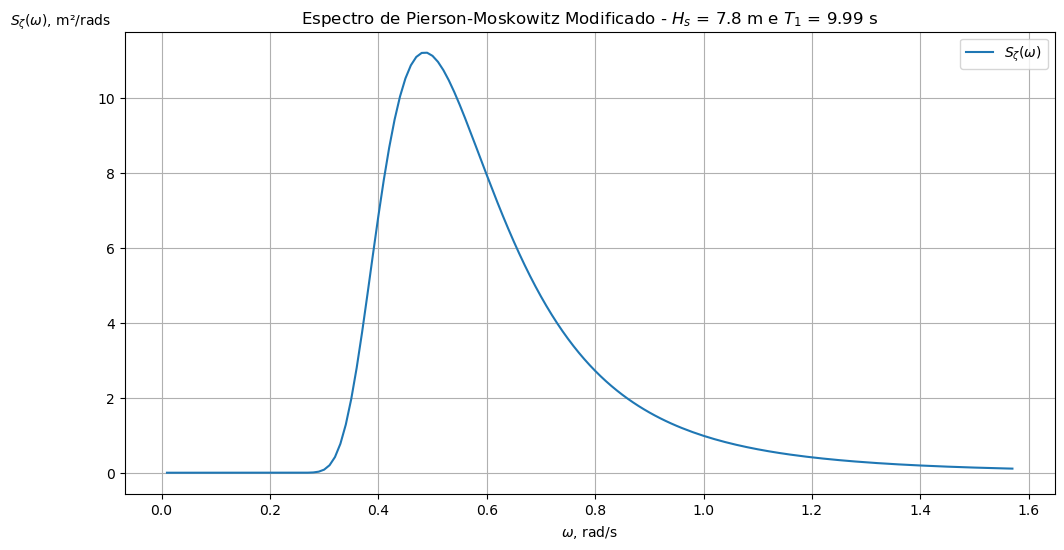

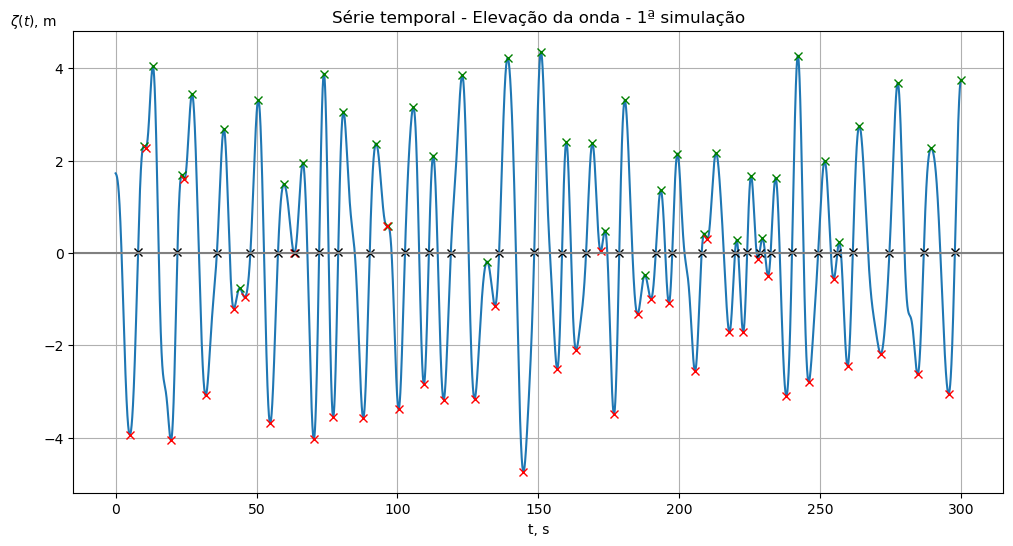

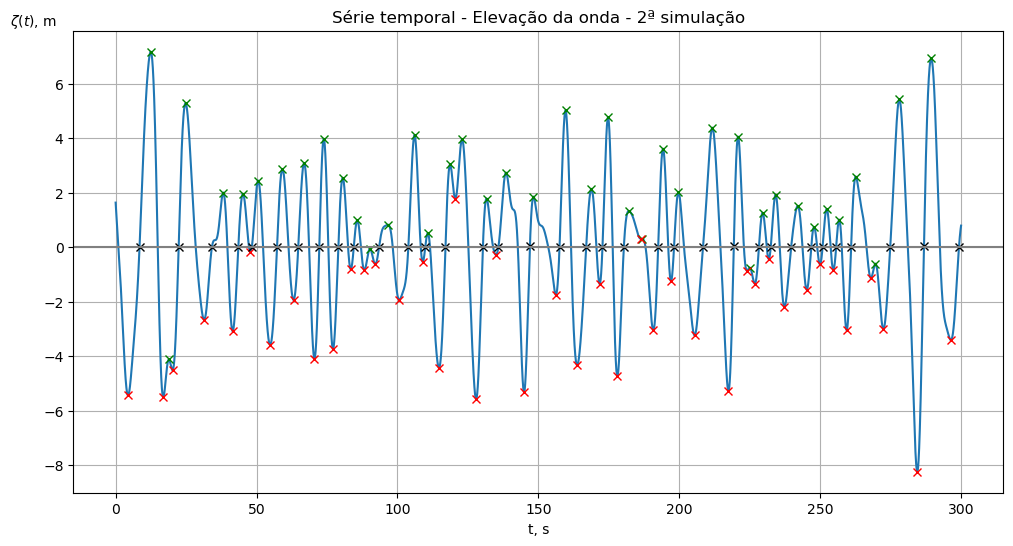

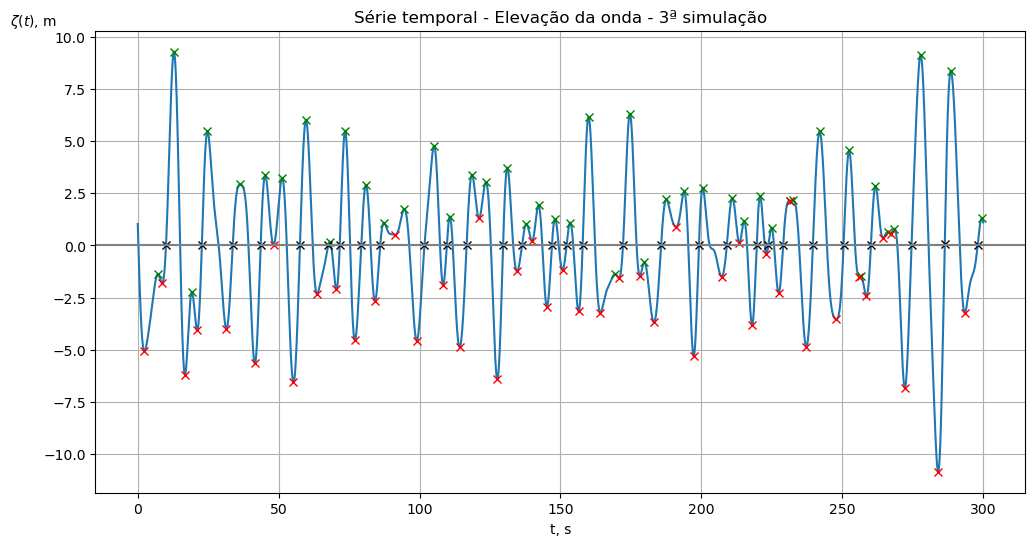

,Espectro,Simulação 1,Simulação 2,Simulação 3
$\bar{{\zeta}}$,2.295950,2.169982,2.406037,2.729375
$\sigma_\zeta$,1.938888,1.401565,2.126752,2.650422
$T_1$,10.263139,7.631053,7.100769,6.798605
$T_2$,9.745496,9.661667,8.551471,9.930345


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.signal import find_peaks, argrelextrema
from scipy import integrate
import pandas as pd

Hs = 7.8 
Tz = 9.2
T1 = 1.086*Tz
dw = 0.01
w = np.arange(0.01, np.pi/2, dw)
S_w = ((173*Hs**2)/(T1**4))*(w**(-5))*np.exp(-(692/(T1**4))*w**(-4))
N = 3

plt.figure(figsize=(12,6))
plt.plot(w, S_w, label=r'$S_{\zeta}(\omega)$')
plt.grid()
plt.legend()
plt.title(r'Espectro de Pierson-Moskowitz Modificado - $H_s$ = {Hs} m e $T_1$ = {T1:.2f} s'.format(Hs = Hs, T1=T1))
plt.xlabel(r'$\omega$, rad/s')
plt.ylabel(r'$S_{\zeta}(\omega)$, m²/rads', loc='top', labelpad=-10, rotation=0)
plt.show()

dw = w[1]-w[0]
t = np.arange(0, 300, 0.01)
zeta_w = np.sqrt(2*S_w*dw)
zeta_t = np.zeros_like(t)
zeta_m = np.zeros(N)
sig_zeta = np.zeros(N)
T1_ts = np.zeros(N)
T2_ts = np.zeros(N)

for n in range(0, N):
    for elev, freq in zip(zeta_w, w):
        fase = random.uniform(0, 2*np.pi)
        z = elev*np.cos(-freq*t + fase)
        zeta_t += z
    plt.figure(figsize=(12,6))
    peaks, _ = find_peaks(zeta_t, None)
    valleys = argrelextrema(zeta_t, np.less)
    t_ind = []
    for ind in range(len(zeta_t)): 
        if ind > 0:
            if zeta_t[ind] > 0 and zeta_t[ind-1] < 0:
                t_ind.append(ind)
   
    plt.plot(t, zeta_t)
    plt.plot(t[peaks], zeta_t[peaks] , "x", color='g')
    plt.plot(t[valleys], zeta_t[valleys] , "x", color='r')
    plt.plot(t[t_ind], zeta_t[t_ind], "x", color='k')
    plt.axhline(y=0, color='gray')
    plt.title(f'Série temporal - Elevação da onda - {n+1}ª simulação')
    plt.xlabel('t, s')
    plt.ylabel(r'$\zeta(t)$, m', loc='top', labelpad=-10, rotation=0)
    plt.grid()
    plt.show()
    zeta_m[n] = np.mean(zeta_t[peaks])
    sig_zeta[n] = np.std(zeta_t[peaks])
    T1_ts[n] = np.mean([t[peaks][i]-t[peaks][i-1] for i in range(len(t[peaks])) if i > 0])
    T2_ts[n] = np.mean([t[t_ind][i]-t[t_ind][i-1] for i in range(len(t[t_ind])) if i > 0])
    
T1_spc = 2*np.pi*(integrate.simpson(S_w, w)/integrate.simpson(S_w*w, w))
T2_spc = 2*np.pi*np.sqrt((integrate.simpson(S_w, w)/integrate.simpson(S_w*w**2, w)))
elev_m = Hs*np.sqrt(np.log(0.5)/(-2))/2
sig_elev = np.sqrt(integrate.simpson(S_w, w))

dict = {"Espectro": [elev_m, sig_elev, T1_spc, T2_spc]}
for n in range(0, N):
    dict[f"Simulação {n+1}"] = [zeta_m[n], sig_zeta[n], T1_ts[n], T2_ts[n]] 
df = pd.DataFrame(data = dict, index = [r"$\bar{{\zeta}}$", r"$\sigma_\zeta$", r"$T_1$", r"$T_2$"])
df

